### Generate Image Data

##### 1. Sample over P to choose a class

##### 2. Sample over set of class prototypes to choose a prototype (for example: a person class can have man, woman, child, prototypes)

##### 3. Sample over parameters of prototype (each prototype has a generator function, with parameters)

##### 4. Generate instance with sampled parameters

In [2]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

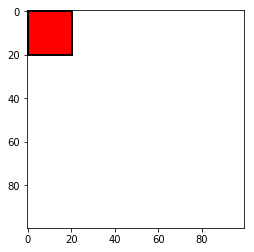

In [174]:
mode = 'RGB'
size = (100, 100)
color = 'white'
im = Image.new(mode, size, color)

draw = ImageDraw.Draw(im)
draw.rectangle([0,0,20,20], 'red', 'black')
imshow(np.asarray(im))

In [175]:
def draw(draw_fn, *args):
    mode = 'RGB'
    size = (512, 512)
    color = 'white'
    im = Image.new(mode, size, color)

    draw = ImageDraw.Draw(im)
    draw_fn(draw, im.size, *args)
    imshow(np.asarray(im))

In [71]:
def rotation(degrees):
    radians = np.radians(degrees)
    c = np.cos(radians)
    s = np.sin(radians)
    return np.array([[c,-s,0], [s,c,0], [0,0,1]])

In [147]:
def translation(xy):
    return np.array([[1,0,0],[0,1,0],[xy[0],xy[1],1]])

In [163]:
import numbers

In [166]:
def scale(s):
    """
    s = (sx, sy) | s
    """
    if isinstance(s, numbers.Number):
        sx = sy = s
    elif type(s) == tuple:
        sx, sy = s
    else:
        raise Exception("s should be a tuple or a number")
    return np.array([[sx,0,0],[0,sy,0],[0,0,1]])

In [207]:
def augment(xy):
    """
    xy: (?, 2) -> (?, 3)
    append a 1 to each point
    """
    shape = xy.shape
    size = shape[0] if len(shape) > 1 else 1
    return np.append(xy.T, np.ones(size)).reshape(3,size).T

In [227]:
xy = np.arange(10)
list(map(tuple, xy.reshape(-1, 2)))

[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

In [248]:
def draw_circle(draw, x, y, dx, dy, transform = None, fill = None, outline = None):
    xy = np.array([[x, y], [x + dx, y + dy]])
    if transform is not None:
        xy = np.matmul(augment(xy), transform)[:,:-1]
    xy = list(map(tuple, xy.reshape(-1, 2)))
    draw.ellipse(xy, fill, outline)

In [278]:
def draw_polygon(draw, xy, transform = None, fill = None, outline = None):
    """
    xy is a 2D numpy array of shape (?, 2)
    """
    if transform is not None:
        xy = np.matmul(augment(xy), transform)[:,:-1]
    xy = list(map(tuple, xy.reshape(-1, 2)))
    draw.polygon(xy, fill, outline)

In [281]:
def draw_rectangle(draw, x, y, dx, dy, transform = None, fill = None, outline = None):
    x1 = x + dx
    y1 = y + dy
    xy = np.array([x, y, x1, y, x1, y1, x, y1]).reshape(-1, 2)
    draw_polygon(draw, xy, transform, fill, outline)

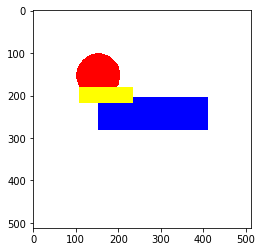

In [297]:
def draw_dog(draw, im_size, origin = np.array([0, 0])):
    im_scale = scale(im_size)
    origin_translation = translation(origin)
    
    head_scale = scale(2) * im_scale
    head_transform = origin_translation * head_scale
    draw_circle(draw, 0.1, 0.1, 0.1, 0.1, head_transform, 'red')
    
    body_scale = im_scale
    body_transform = origin_translation * body_scale
    draw_rectangle(draw, 0.3, 0.4, 0.5, 0.15, body_transform, 'blue')
    
    front_leg_scale = im_scale
    front_leg_rotation = rotation(45)
    front_leg_transform = origin_translation * front_leg_rotation * front_leg_scale
    draw_rectangle(draw, 0.3, 0.5, 0.35, 0.1, front_leg_transform, 'yellow')
    
#     body_origin = head + np.array([0, 0]) * scale
#     body_size = np.array([4., 1.]) * scale
#     body = body_origin + body_size
#     draw.rectangle([tuple(body_origin), tuple(body)], 'blue', None)
draw(draw_dog)

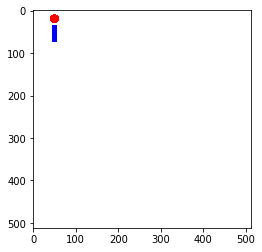

In [169]:
def draw_person(draw, x = 0, y = 0):
    origin = np.array([x, y])
    head_origin = origin + np.array([40, 10])
    head_size = np.array([20, 20])
    head = head_origin + head_size
    draw.ellipse([tuple(head_origin), tuple(head)], 'red', None)
    
    body_origin = head + np.array([-15, 5])
    body_size = np.array([10, 40])
    body = body_origin + body_size
    draw.rectangle([tuple(body_origin), tuple(body)], 'blue', None)
    
draw(draw_person)